In [1]:
import tensorflow as tf
import glob
import numpy as np
import os
import pandas as pd
import sys
import speechpy

2025-02-12 13:19:05.217205: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-12 13:19:05.258938: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
os.chdir('/home/hy381/rds/hpc-work/segmented_data_new')


In [4]:
tf_files

['1374/1374_segment_34.tfrecord',
 '1374/1374_segment_214.tfrecord',
 '1374/1374_segment_153.tfrecord',
 '1374/1374_segment_322.tfrecord',
 '1374/1374_segment_328.tfrecord',
 '1374/1374_segment_18.tfrecord',
 '1374/1374_segment_315.tfrecord',
 '1374/1374_segment_242.tfrecord',
 '1374/1374_segment_133.tfrecord',
 '1374/1374_segment_336.tfrecord',
 '1374/1374_segment_68.tfrecord',
 '1374/1374_segment_79.tfrecord',
 '1374/1374_segment_308.tfrecord',
 '1374/1374_segment_144.tfrecord',
 '1374/1374_segment_321.tfrecord',
 '1374/1374_segment_93.tfrecord',
 '1374/1374_segment_94.tfrecord',
 '1374/1374_segment_280.tfrecord',
 '1374/1374_segment_209.tfrecord',
 '1374/1374_segment_69.tfrecord',
 '1374/1374_segment_249.tfrecord',
 '1374/1374_segment_273.tfrecord',
 '1374/1374_segment_23.tfrecord',
 '1374/1374_segment_81.tfrecord',
 '1374/1374_segment_60.tfrecord',
 '1374/1374_segment_15.tfrecord',
 '1374/1374_segment_227.tfrecord',
 '1374/1374_segment_333.tfrecord',
 '1374/1374_segment_281.tfrecor

In [5]:
sys.path.append('/home/hy381/model_training/src')

In [6]:
import utils

In [7]:
import matplotlib.pyplot as plt

In [8]:
data_labels_path = '/home/hy381/rds/hpc-work/segmented_data_new/segmented_data_combined_apnea.csv'

In [9]:
data_labels = pd.read_csv(data_labels_path)

In [16]:
data_labels.head()

,Unnamed: 0,subject,file,label
0,0,995,995/995_segment_0.tfrecord,1
1,1,995,995/995_segment_1.tfrecord,1
2,2,995,995/995_segment_2.tfrecord,1
3,3,995,995/995_segment_3.tfrecord,1
4,4,995,995/995_segment_4.tfrecord,1


In [17]:
data_labels = data_labels.drop(columns = ['Unnamed: 0'])

In [21]:
data_labels['mel_spec'] = False

In [27]:
data_labels.loc[data_labels['file'] == '995/995_segment_0.tfrecord', 'mel_spec'] = True

In [29]:
np.unique(data_labels['label'].values)

array([0, 1, 2, 3])

In [28]:
data_labels.head()

,subject,file,label,mel_spec
0,995,995/995_segment_0.tfrecord,1,True
1,995,995/995_segment_1.tfrecord,1,False
2,995,995/995_segment_2.tfrecord,1,False
3,995,995/995_segment_3.tfrecord,1,False
4,995,995/995_segment_4.tfrecord,1,False


In [24]:
data_labels.to_csv(data_labels_path, index=False)

In [12]:
tf_files = set(glob.glob('*/*.tfrecord'))
csv_files = set(data_labels['file'].values)

In [15]:
'1000/1000_segment_0.tfrecord' in csv_files

True

In [14]:
tf_files - csv_files

{'1112/1112_segment_305.tfrecord',
 '1541/1541_segment_50.tfrecord',
 '1339/1339_segment_88.tfrecord',
 '1157/1157_segment_6.tfrecord',
 '1394/1394_segment_383.tfrecord',
 '1394/1394_segment_556.tfrecord',
 '1541/1541_segment_51.tfrecord',
 '1116/1116_segment_81.tfrecord',
 '1394/1394_segment_347.tfrecord',
 '1157/1157_segment_235.tfrecord',
 '1112/1112_segment_390.tfrecord',
 '1157/1157_segment_71.tfrecord',
 '1394/1394_segment_329.tfrecord',
 '1394/1394_segment_156.tfrecord',
 '1112/1112_segment_24.tfrecord',
 '1112/1112_segment_125.tfrecord',
 '1157/1157_segment_20.tfrecord',
 '1110/1110_segment_279.tfrecord',
 '1394/1394_segment_295.tfrecord',
 '1157/1157_segment_134.tfrecord',
 '1112/1112_segment_133.tfrecord',
 '1110/1110_segment_110.tfrecord',
 '1116/1116_segment_111.tfrecord',
 '1116/1116_segment_91.tfrecord',
 '1110/1110_segment_186.tfrecord',
 '1394/1394_segment_552.tfrecord',
 '1394/1394_segment_94.tfrecord',
 '1394/1394_segment_223.tfrecord',
 '1394/1394_segment_127.tfrecor

In [8]:
fnames = utils.split_train_valid_test()[0]

In [ ]:
train_data, _, _ = utils.prepare_data_subset('audio')

Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [46]:
def mel_to_mfcc(mel_spectrogram, sampling_rate=8000, num_mfcc=13):
    # Convert the Mel Spectrogram to MFCC using TensorFlow
    mfccs = tf.signal.mfccs_from_log_mel_spectrograms(mel_spectrogram)  # [batch, time, num_mfcc]
    
    # Keep only the desired number of MFCC coefficients (typically 13 or 20)
    mfccs = mfccs[:, :, :num_mfcc]

    return mfccs

def cmvn_tf(mfccs, variance_normalization=True):
    mean = tf.reduce_mean(mfccs, axis=1, keepdims=True)  # Compute mean along time axis
    std = tf.math.reduce_std(mfccs, axis=1, keepdims=True)  # Compute std along time axis

    normalized_mfccs = mfccs - mean  # Mean normalization

    if variance_normalization:
        normalized_mfccs = normalized_mfccs / (std + 1e-8)  # Variance normalization

    return normalized_mfccs

num_mel_bins = 64
sampling_rate = 8000
sequence_stride = 160
fft_length = 400
n_samples = 320000
model = tf.keras.models.Sequential()
# Input Layer - all inputs are dimensions (320,000, ) -> outputs (320,000, ) 
model.add(tf.keras.layers.MelSpectrogram(num_mel_bins = num_mel_bins, sampling_rate = sampling_rate, sequence_stride = sequence_stride, fft_length = fft_length, min_freq = 70, max_freq = 7500, power_to_db=True))
model.add(tf.keras.layers.Lambda(lambda x: mel_to_mfcc(x)))
# model.add(tf.keras.layers.Lambda(lambda x: cmvn_tf(x)))

In [48]:
for data in train_data.take(1): 
    audio, _ , _= data
    output = model(audio)[0]
    print(speechpy.processing.cmvn(output))

tf.Tensor(
[[ 2.14312549e+03 -1.30837049e+01  3.98290396e+00  6.03504562e+01
  -7.21465349e+00 -2.27442694e+00  3.62644806e+01 -1.57181168e+01
  -1.33238182e+01  3.32984686e+00 -1.21033306e+01 -3.17037277e+01
  -2.99884176e+00]
 [ 2.19879736e+03 -9.48643208e+00  7.71095085e+00  6.37734604e+01
  -1.90149403e+01  1.85292947e+00  3.06502361e+01 -2.30727825e+01
  -1.33131027e+01  2.16058969e+00 -1.88346462e+01 -3.08648453e+01
  -2.28869724e+00]
 [ 2.21876538e+03 -1.43730412e+01  1.01829605e+01  5.83728790e+01
  -1.97452202e+01  9.69612980e+00  2.86931248e+01 -2.14416656e+01
  -7.50336981e+00  2.07724571e+00 -2.43683319e+01 -2.54024830e+01
  -1.93150711e+01]
 [ 1.95567053e+03 -1.19707537e+01  9.49608517e+00  5.92324219e+01
  -7.61872816e+00  1.06256113e+01  2.18458176e+01 -1.76115704e+01
  -1.02027893e+01  2.90998745e+00 -3.02034721e+01 -2.39647255e+01
  -2.28410397e+01]
 [ 1.44959888e+03 -5.73141050e+00  5.40771103e+00  6.73867493e+01
  -9.14974451e-01  1.25627489e+01  1.71370163e+01 -1.58

In [ ]:
for data in train_data.take(1): 
    audio, _ , _= data
    print(audio.shape)
    output = model(audio)
    mfccs =output.numpy()
    print(mfccs[0])
    print(mfccs.shape)



(32, 320000)
[[ 3.64837313e+00 -3.73305845e+00  1.65600693e+00  2.99187422e+00
  -1.82469594e+00 -7.46222377e-01  4.15741253e+00 -2.79171753e+00
  -3.40183878e+00  2.55761313e+00 -1.60320044e+00 -3.53129673e+00
  -5.31564534e-01]
 [ 3.74314690e+00 -2.70668006e+00  3.20604944e+00  3.16156983e+00
  -4.80916786e+00  6.07932270e-01  3.51378727e+00 -4.09799051e+00
  -3.39910293e+00  1.65952158e+00 -2.49482679e+00 -3.43785834e+00
  -4.05686706e-01]
 [ 3.77713966e+00 -4.10093355e+00  4.23385859e+00  2.89383578e+00
  -4.99386644e+00  3.18122721e+00  3.28942108e+00 -3.80828547e+00
  -1.91576123e+00  1.59550607e+00 -3.22781587e+00 -2.82943702e+00
  -3.42372394e+00]
 [ 3.32925773e+00 -3.41550994e+00  3.94827032e+00  2.93644762e+00
  -1.92689252e+00  3.48618317e+00  2.50443602e+00 -3.12801671e+00
  -2.60497737e+00  2.23512435e+00 -4.00073528e+00 -2.66929364e+00
  -4.04872513e+00]
 [ 2.46774197e+00 -1.63529277e+00  2.24841142e+00  3.34069872e+00
  -2.31411204e-01  4.12174320e+00  1.96461236e+00 -2.

2025-02-10 11:33:23.965857: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [12]:
parsed_data = dataset.map(lambda x : utils._parse_data(x, features=['spo2']))


Shapes must be equal rank, but are 0 and 1


InvalidArgumentError: Length for attr 'output_shapes' of 0 must be at least minimum 1
	; NodeDef: {{node MapDataset}}; Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> [Op:MapDataset] name: 

In [4]:
train_files1, valid_files1, test_files1 = utils.split_train_valid_test_subset(data_labels) 
train_files2, valid_files2, test_files2 = utils.split_train_valid_test_subset(data_labels) 

In [7]:
set(train_files1) - set(train_files2)

set()

In [6]:
train_files2

array(['1392/1392_segment_54.tfrecord', '1254/1254_segment_47.tfrecord',
       '1287/1287_segment_147.tfrecord', '1097/1097_segment_314.tfrecord',
       '1621/1621_segment_85.tfrecord', '1554/1554_segment_104.tfrecord',
       '1570/1570_segment_193.tfrecord', '1412/1412_segment_166.tfrecord',
       '1478/1478_segment_11.tfrecord', '1510/1510_segment_91.tfrecord',
       '1578/1578_segment_457.tfrecord', '1206/1206_segment_88.tfrecord',
       '1578/1578_segment_352.tfrecord', '1521/1521_segment_59.tfrecord',
       '1667/1667_segment_92.tfrecord', '1376/1376_segment_142.tfrecord',
       '1447/1447_segment_160.tfrecord', '1147/1147_segment_414.tfrecord',
       '1024/1024_segment_274.tfrecord', '1656/1656_segment_331.tfrecord',
       '1151/1151_segment_255.tfrecord', '1656/1656_segment_223.tfrecord',
       '1041/1041_segment_152.tfrecord', '1316/1316_segment_269.tfrecord',
       '1039/1039_segment_237.tfrecord', '1095/1095_segment_36.tfrecord',
       '1570/1570_segment_209.tfre

In [46]:
train_files, valid_files, test_files = utils.split_train_valid_test_subset(data_labels) 
   
train_data_tf = tf.data.TFRecordDataset(train_files)
train_data = parse_tf_record_dataset(train_data_tf, ['spo2'])
# train_data_batched = train_data.batch(32, drop_remainder=True).repeat()


In [ ]:
trainf

In [47]:
feature = 'spo2'
train_data_tf = tf.data.TFRecordDataset(train_files)
train_data = parse_tf_record_dataset(train_data_tf, [feature])
# train_data_batched = train_data.batch(train_batch_size, drop_remainder=True).repeat()

valid_data_tf = tf.data.TFRecordDataset(valid_files)
valid_data = parse_tf_record_dataset(valid_data_tf, [feature])
# valid_data_batched = valid_data.batch(valid_test_batch_size, drop_remainder = True).repeat()

test_data_tf = tf.data.TFRecordDataset(test_files)
test_data = parse_tf_record_dataset(test_data_tf, [feature])
# test_data_batched = test_data.batch(valid_test_batch_size, drop_remainder = True)

In [11]:
os.chdir('/home/hy381/rds/hpc-work/segmented_data_new')


In [18]:
for data in train_data_tf:
    spo2, label = utils._parse_data(data, ['spo2'])
    print(spo2)

tf.Tensor(
[93.6 93.6 93.5 93.5 93.5 94.1 94.4 94.4 94.4 94.4 94.8 94.8 94.8 95.2
 95.2 94.8 94.4 94.2 94.  94.  93.9 93.8 93.7 93.6 93.4 93.3 93.3 93.3
 93.6 94.  94.1 94.1 94.3 94.5 94.4 94.2 94.2 94.  94.  93.7], shape=(40,), dtype=float32)
tf.Tensor(
[83.2 85.  85.4 90.4 90.4 92.7 93.3 96.4 97.6 98.2 98.3 98.3 98.5 98.5
 98.5 98.5 98.5 98.5 98.5 98.4 98.2 98.1 97.9 97.9 97.7 97.4 97.2 97.
 96.8 96.5 96.5 96.1 95.6 95.4 95.2 94.8 94.8 93.8 93.4 92.8], shape=(40,), dtype=float32)
tf.Tensor(
[89.1 88.7 88.4 87.9 87.4 87.4 87.9 87.6 86.9 85.7 85.2 85.1 85.1 85.4
 87.  87.1 86.5 86.5 86.5 86.6 88.1 88.3 88.7 88.9 89.  89.  90.8 91.6
 94.7 95.6 96.  96.3 96.3 96.2 95.8 95.7 95.5 95.5 95.  94.8], shape=(40,), dtype=float32)
tf.Tensor(
[94.2 94.2 94.1 94.1 94.1 94.  94.  93.8 93.5 93.4 93.2 93.1 93.1 93.1
 93.8 93.8 93.7 93.7 93.7 94.  94.  94.  93.6 93.3 93.1 92.9 92.9 92.6
 92.  91.6 91.6 91.6 91.6 91.4 91.5 91.5 91.4 91.5 91.5 91.6], shape=(40,), dtype=float32)
tf.Tensor(
[89.1 89.  89.

In [35]:
def _parse_data(proto, features):
    audio_sample_rate = 8000
    segment_time = 40 
    keys_to_features = {
        'label': tf.io.FixedLenFeature([1], tf.int64),
        'audio': tf.io.FixedLenFeature([audio_sample_rate * segment_time], tf.float32), 
        'spo2': tf.io.FixedLenFeature([segment_time], tf.float32) 
    }

    try: 
        parsed_features = tf.io.parse_single_example(proto, keys_to_features)
        
        label = parsed_features['label']
        label = tf.squeeze(label)
        
        label = tf.where(label == tf.constant(3, dtype=tf.int64), tf.constant(2, dtype=tf.int64), label)
        label = tf.where(label == tf.constant(4, dtype=tf.int64), tf.constant(3, dtype=tf.int64), label)

        label_enc = tf.one_hot(label, 4)
        label_enc.set_shape([4])

        # spo2 = parsed_features['spo2']
        # delta_spo2 = tf.numpy_function(apply_delta, [spo2], tf.float32)
        # delta_spo2.set_shape([20])
        # parsed_features['spo2'] = delta_spo2
        return_vals = [parsed_features[feature] for feature in features]
        return_vals.append(label_enc)
        return tuple(return_vals)
    except tf.errors.InvalidArgumentError:
        return None
    except Exception as e:
        print(e) 
        return None

    
def parse_tf_record_dataset(dataset, features):
    parsed_data = dataset.map(lambda x : _parse_data(x, features=features))
    # parsed_data = parsed_data.filter(lambda *x: x[0] is not None)
    return parsed_data

In [36]:
parse_tf_record_dataset(train_data_tf, ['spo2'])

<_MapDataset element_spec=(TensorSpec(shape=(40,), dtype=tf.float32, name=None), TensorSpec(shape=(4,), dtype=tf.float32, name=None))>

In [6]:
train_data_batched, valid_data_batched, test_data_batched = utils.prepare_data_subset(data_labels, feature = ['spo2'], train_length=1200, valid_length = 90, test_length = 90, train_batch_size= 128, valid_test_batch_size= 32)

'label' has dtype int32 in the main branch, but dtype int64 in the else branch


InvalidArgumentError: Length for attr 'output_shapes' of 0 must be at least minimum 1
	; NodeDef: {{node MapDataset}}; Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> [Op:MapDataset] name: 

In [128]:
data_labels[data_labels['subject'] == 1135]

,Unnamed: 0,subject,file,label
11927,11934,1135,1135/1135_segment_0.tfrecord,1
11928,11935,1135,1135/1135_segment_1.tfrecord,3
11929,11936,1135,1135/1135_segment_2.tfrecord,2
11930,11937,1135,1135/1135_segment_3.tfrecord,2
11931,11938,1135,1135/1135_segment_4.tfrecord,2
...,...,...,...,...
12069,12121,1135,1135/1135_segment_187.tfrecord,0
12070,12122,1135,1135/1135_segment_188.tfrecord,0
12071,12123,1135,1135/1135_segment_189.tfrecord,0
12072,12124,1135,1135/1135_segment_190.tfrecord,0


In [129]:
data_labels = data_labels.drop[data_labels.loc['subject'] == 1541]

,Unnamed: 0,subject,file,label


In [18]:
data_labels = data_labels.drop(columns = ['Unnamed: 0'])

In [19]:
data_labels.to_csv(data_labels_path, index = False)

In [6]:
data_labels.loc[data_labels['label'] == 3, 'label'] = 2
data_labels.loc[data_labels['label'] == 4, 'label'] = 3


In [51]:
np.unique(data_labels['label'].values)

array([0, 1, 2, 3])

In [8]:
data_labels = data_labels.drop(columns = ['Unnamed: 0'])

In [52]:
def _parse_data(proto, features):
    audio_sample_rate = 8000
    segment_time = 40 
    keys_to_features = {
        'label': tf.io.FixedLenFeature([1], tf.int64),
        'audio': tf.io.FixedLenFeature([audio_sample_rate * segment_time], tf.float32), 
        'spo2': tf.io.FixedLenFeature([segment_time], tf.float32) 
    }

    parsed_features = tf.io.parse_single_example(proto, keys_to_features)

    label = tf.convert_to_tensor(parsed_features['label'])
    if label == 3: 
        label = 2
    if label == 4: 
        label = 3
    label_enc = tf.squeeze(tf.one_hot(label, 4))
    label_enc.set_shape([4])

        # spo2 = parsed_features['spo2']
        # delta_spo2 = tf.numpy_function(apply_delta, [spo2], tf.float32)
        # delta_spo2.set_shape([20])
        # parsed_features['spo2'] = delta_spo2
    return_vals = [parsed_features[feature] for feature in features]
    return_vals.append(label_enc)
    return tuple(return_vals)
    # except tf.errors.InvalidArgumentError:
    #     print("error")
    #     return None
    # except Exception as e:
    #     print(e) 
    #     return None

In [64]:
data_labels = pd.read_csv(data_labels_path)

In [65]:
data_labels

,subject,file,label
0,995,995/995_segment_0.tfrecord,1
1,995,995/995_segment_1.tfrecord,1
2,995,995/995_segment_2.tfrecord,1
3,995,995/995_segment_3.tfrecord,1
4,995,995/995_segment_4.tfrecord,1
...,...,...,...
84263,1701,1701/1701_segment_392.tfrecord,0
84264,1701,1701/1701_segment_393.tfrecord,0
84265,1701,1701/1701_segment_394.tfrecord,0
84266,1701,1701/1701_segment_395.tfrecord,0


In [119]:
error_fnames = []
all_files = data_labels['file'].values
dataset = tf.data.TFRecordDataset(all_files)
# for i, data in enumerate(dataset): 
#     subject_fname = all_files[i]
#     try: 
#         _parse_data(data, ['spo2'])
#     except tf.errors.InvalidArgumentError: 
#         print(subject_fname)
#         error_fnames.append(subject_fname)

In [124]:
parsed_data = utils.parse_tf_record_dataset(dataset, ['spo2'])

Cause: could not parse the source code of <function parse_tf_record_dataset.<locals>.<lambda> at 0x14765e51f2e0>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function parse_tf_record_dataset.<locals>.<lambda> at 0x14765e51f2e0>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [125]:
for data in parsed_data: 
    print(data)

(<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([95.2, 95.2, 95.5, 95.2, 95.2, 95.3, 95.3, 95.3, 95.3, 95.2, 95.1,
       94.8, 94.5, 94.1, 94.1, 93.7, 93.3, 93. , 92.4, 92.3, 92.3, 92.1,
       91.8, 92. , 92.1, 92.1, 92.1, 92.9, 93.1, 93.4, 93.6, 93.6, 93.6,
       93.6, 94.2, 95.2, 95.3, 95.8, 95.8, 95.8], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 1., 0.], dtype=float32)>)
(<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([94.1, 93.3, 92.7, 92.7, 92.7, 92.6, 92.7, 93. , 93. , 93.3, 93.5,
       94. , 94.5, 94.7, 95.8, 95.8, 95.4, 95.8, 96.4, 96.1, 95.9, 95.9,
       95.8, 95.6, 95.3, 94.9, 94.4, 94.4, 94.1, 93.9, 93.4, 92.6, 92.2,
       92.2, 92.2, 91.8, 91.8, 91.6, 91.6, 91.6], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 1., 0.], dtype=float32)>)
(<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([91.8, 92.4, 93.3, 93.3, 95.9, 95.9, 96.4, 96.5, 96.3, 96.2, 95.9,
       95.8, 95.8, 95.6, 95.4, 95. , 94.4, 94.4

KeyboardInterrupt: 

In [75]:
error_fnames

['1014/1014_segment_189.tfrecord',
 '1059/1059_segment_208.tfrecord',
 '1069/1069_segment_151.tfrecord',
 '1073/1073_segment_258.tfrecord',
 '1086/1086_segment_188.tfrecord',
 '1089/1089_segment_215.tfrecord',
 '1129/1129_segment_253.tfrecord',
 '1135/1135_segment_110.tfrecord',
 '1135/1135_segment_111.tfrecord',
 '1135/1135_segment_112.tfrecord',
 '1135/1135_segment_113.tfrecord',
 '1135/1135_segment_114.tfrecord',
 '1135/1135_segment_115.tfrecord',
 '1135/1135_segment_116.tfrecord',
 '1135/1135_segment_117.tfrecord',
 '1135/1135_segment_118.tfrecord',
 '1135/1135_segment_119.tfrecord',
 '1135/1135_segment_120.tfrecord',
 '1135/1135_segment_121.tfrecord',
 '1135/1135_segment_122.tfrecord',
 '1135/1135_segment_123.tfrecord',
 '1135/1135_segment_124.tfrecord',
 '1135/1135_segment_125.tfrecord',
 '1135/1135_segment_126.tfrecord',
 '1135/1135_segment_127.tfrecord',
 '1135/1135_segment_128.tfrecord',
 '1135/1135_segment_129.tfrecord',
 '1135/1135_segment_130.tfrecord',
 '1135/1135_segment_

In [67]:
error_subjects = [1204, 1222, 1290, 1340, 1412, 1434, 1457, 1474, 1476, 1603]

In [77]:
for fname in error_fnames: 
	data_labels = data_labels.drop(data_labels.loc[data_labels['file'] == fname].index)

In [ ]:
data_labels.to_csv(data_labels_path)

In [ ]:
for fname in error_fnames: 
    data_labels = data_labels.drop(data_labels.loc[data_labels['file'] == fname].index)

In [91]:
data_labels = data_labels.drop(data_labels.loc[data_labels['subject'] == 1651].index)

In [ ]:
error_fnames

In [54]:
os.chdir('/home/hy381/rds/hpc-work/segmented_data_new')


In [101]:
data_labels = data_labels.drop(data_labels.loc[data_labels['file'] == '1663/1663_segment_168.tfrecord'].index)

In [132]:
data_labels.to_csv(data_labels_path, index = False)

In [130]:
data_labels = data_labels.drop(data_labels.loc[data_labels['subject'] == 1135].index)


In [142]:
data_labels[data_labels['subject'] == 999]

,Unnamed: 0,subject,file,label
345,345,999,999/999_segment_0.tfrecord,2
346,346,999,999/999_segment_1.tfrecord,2
347,347,999,999/999_segment_2.tfrecord,2
348,348,999,999/999_segment_3.tfrecord,2
349,349,999,999/999_segment_4.tfrecord,2
...,...,...,...,...
622,622,999,999/999_segment_277.tfrecord,0
623,623,999,999/999_segment_278.tfrecord,0
624,624,999,999/999_segment_279.tfrecord,0
625,625,999,999/999_segment_280.tfrecord,0


In [143]:
non_apnea_files = data_labels[data_labels['label'] == 0]['file'].values.astype(str)
    
hypopnea_files = data_labels[data_labels['label'] == 1]['file'].values.astype(str)

apnea_files = data_labels[data_labels['label'] == 2]['file'].values.astype(str)
    
mixed_apnea_files = data_labels[data_labels['label'] == 3]['file'].values.astype(str)

In [1]:
train_data_batched, valid_data_batched, test_data_batched = utils.prepare_data_subset(data_labels, feature = ['spo2'], train_length=1200, valid_length = 90, test_length = 90, train_batch_size= 128, valid_test_batch_size= 32)

NameError: name 'utils' is not defined

In [146]:
mixed_apnea_files

array(['995/995_segment_45.tfrecord', '995/995_segment_123.tfrecord',
       '995/995_segment_124.tfrecord', ...,
       '1699/1699_segment_333.tfrecord', '1701/1701_segment_66.tfrecord',
       '1701/1701_segment_159.tfrecord'], dtype='<U30')

In [112]:
data_label_files = data_labels['file'].values
tfrecord_files = glob.glob('*/*.tfrecord')
diff = set(data_label_files) - set(tfrecord_files)

In [115]:
data_label_files

array(['995/995_segment_0.tfrecord', '995/995_segment_1.tfrecord',
       '995/995_segment_2.tfrecord', ...,
       '1701/1701_segment_394.tfrecord', '1701/1701_segment_395.tfrecord',
       '1701/1701_segment_396.tfrecord'], dtype=object)

In [118]:
tfrecord_files[40000]

'1438/1438_segment_94.tfrecord'

In [111]:
pwd

'/rds/user/hy381/hpc-work/segmented_data_new'

In [109]:
subject_data_labels = data_labels.loc[data_labels['subject'] == 1135]
subject_files = subject_data_labels['file'].values
dataset = tf.data.TFRecordDataset(subject_files)
for i, data in enumerate(dataset): 
    subject_fname = subject_files[i]
    try: 
        _parse_data(data, ['spo2'])
    except tf.errors.InvalidArgumentError: 
        print(subject_fname)
        error_fnames.append(subject_fname)

NotFoundError: {{function_node __wrapped__IteratorGetNext_output_types_1_device_/job:localhost/replica:0/task:0/device:CPU:0}} 1135/1135_segment_0.tfrecord; No such file or directory [Op:IteratorGetNext] name: 

In [106]:
subjects = data_labels['subject'].values
subjects = np.unique(subjects[subjects >= 1628])

error_fnames = []
for subject in subjects: 
    subject_data_labels = data_labels.loc[data_labels['subject'] == subject]
    subject_files = subject_data_labels['file'].values
    dataset = tf.data.TFRecordDataset(subject_files)
    for i, data in enumerate(dataset): 
        subject_fname = subject_files[i]
        try: 
            _parse_data(data, ['spo2'])
        except tf.errors.InvalidArgumentError: 
            print(subject_fname)
            error_fnames.append(subject_fname)

KeyboardInterrupt: 

In [81]:
errors = ['1204/1204_segment_234.tfrecord',
 '1222/1222_segment_121.tfrecord',
 '1290/1290_segment_267.tfrecord',
 '1340/1340_segment_90.tfrecord',
 '1412/1412_segment_177.tfrecord',
 '1434/1434_segment_230.tfrecord',
 '1457/1457_segment_197.tfrecord',
 '1474/1474_segment_145.tfrecord',
 '1476/1476_segment_234.tfrecord',
 '1603/1603_segment_160.tfrecord']

In [ ]:
for fname in errors: 
    print(data_labels.loc[data_labels['file'] == fname])

       Unnamed: 0  subject file  label
0             NaN      NaN  NaN    NaN
1             NaN      NaN  NaN    NaN
2             NaN      NaN  NaN    NaN
3             NaN      NaN  NaN    NaN
4             NaN      NaN  NaN    NaN
...           ...      ...  ...    ...
84198         NaN      NaN  NaN    NaN
84199         NaN      NaN  NaN    NaN
84200         NaN      NaN  NaN    NaN
84201         NaN      NaN  NaN    NaN
84202         NaN      NaN  NaN    NaN

[84203 rows x 4 columns]
       Unnamed: 0  subject file  label
0             NaN      NaN  NaN    NaN
1             NaN      NaN  NaN    NaN
2             NaN      NaN  NaN    NaN
3             NaN      NaN  NaN    NaN
4             NaN      NaN  NaN    NaN
...           ...      ...  ...    ...
84198         NaN      NaN  NaN    NaN
84199         NaN      NaN  NaN    NaN
84200         NaN      NaN  NaN    NaN
84201         NaN      NaN  NaN    NaN
84202         NaN      NaN  NaN    NaN

[84203 rows x 4 columns]
       Unnam

In [60]:
data_labels.to_csv(data_labels_path)

In [34]:
np.unique(data_labels['label'].values)

array([0, 1, 2, 3])

In [32]:
error_fnames

[]

In [10]:
data_labels.to_csv('/home/hy381/rds/hpc-work/segmented_data_new/segmented_data_combined_apnea.csv')

In [25]:
data_labels['file'] = data_labels['file'].apply(lambda f: os.path.basename(f))
data_labels['file'] = data_labels.apply(lambda row: os.path.join(str(row['subject']), row['file']), axis = 1)

In [26]:
data_labels

,subject,file,label
0,1176,1176/1176_segment_0.tfrecord,1
1,1176,1176/1176_segment_1.tfrecord,1
2,1176,1176/1176_segment_2.tfrecord,1
3,1176,1176/1176_segment_3.tfrecord,2
4,1176,1176/1176_segment_4.tfrecord,1
...,...,...,...
5695,1147,1147/1147_segment_280.tfrecord,0
5696,1147,1147/1147_segment_281.tfrecord,0
5697,1147,1147/1147_segment_282.tfrecord,0
5698,1147,1147/1147_segment_283.tfrecord,0


In [61]:
data_labels = data_labels.to_csv(data_labels_path, index = False)

In [96]:
subjects = data_labels['subject'].values
subjects = np.unique(subjects[subjects >= 1651])

In [97]:
subjects

array([1656, 1658, 1659, 1661, 1663, 1667, 1669, 1671, 1673, 1677, 1679,
       1681, 1683, 1687, 1689, 1693, 1695, 1699, 1701])

In [35]:
files = data_labels['file'].values
os.chdir('/home/hy381/rds/hpc-work/segmented_data_shorter_segments')

In [36]:
dataset = tf.data.TFRecordDataset(files)

In [28]:

def apply_delta(spo2_tensor): 
    # spo2_np = spo2_tensor.numpy()
    threshold = 10
    # Apply the Savitzky-Golay filter
    # smoothed_spo2 = savgol_filter(spo2_tensor, window_length=10, polyorder=3, mode='nearest')
    if len(spo2_tensor[spo2_tensor < threshold]) > 0: 
        print(spo2_tensor[spo2_tensor < threshold])
    spo2_tensor[spo2_tensor < threshold]  = np.mean(spo2_tensor[spo2_tensor >= threshold])
    
    delta_spo2 = []
    # t ranging from 1 ~ 10
    t_vals = np.arange(1, 11)

    for n in range(10, 30): 
        t_samples_after = n + t_vals
        t_samples_before = n - t_vals
        pre_spo2 = spo2_tensor[t_samples_before]
        post_spo2 = spo2_tensor[t_samples_after]
        delta_val = np.sum(t_vals * (post_spo2 - pre_spo2))/(2 * np.sum(t_vals ** 2))
        delta_spo2.append(delta_val) 
    return tf.convert_to_tensor(delta_spo2, dtype=tf.float32)

def _parse_data(proto, features):
    audio_sample_rate = 8000
    segment_time = 40 
    keys_to_features = {
        'label': tf.io.FixedLenFeature([1], tf.int64),
        'audio': tf.io.FixedLenFeature([audio_sample_rate * segment_time], tf.float32), 
        'spo2': tf.io.FixedLenFeature([segment_time], tf.float32) 
    }

    try: 
        parsed_features = tf.io.parse_single_example(proto, keys_to_features)
        
        label = tf.convert_to_tensor(parsed_features['label'])
        label_enc = tf.squeeze(tf.one_hot(label, 3))
        label_enc.set_shape([3])

        spo2 = parsed_features['spo2']
        # try: 
        #     delta_spo2 = tf.numpy_function(apply_delta, [spo2], tf.float32)
        #     delta_spo2.set_shape([20])
        #     parsed_features['spo2'] = delta_spo2
        # except Exception as e: 
        #     print(e)
        return_vals = [parsed_features[feature] for feature in features]
        # return_vals.append(label_enc)
        return parsed_features['spo2']
    except tf.errors.InvalidArgumentError:
        return None
    except Exception as e:
        print(e) 
        return None

In [37]:
for i, data in enumerate(dataset):
    fname = files[i]
    threshold = 10
    try: 
        spo2 = utils._parse_data(data, ['spo2'])
    except Exception as e: 
        print(e)

2025-01-27 19:24:46.206747: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:370] TFRecordDataset `buffer_size` is unspecified, default to 262144
2025-01-27 19:24:46.246669: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at example_parsing_ops.cc:98 : INVALID_ARGUMENT: Key: spo2.  Can't parse serialized Example.
2025-01-27 19:24:46.246701: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: INVALID_ARGUMENT: Key: spo2.  Can't parse serialized Example.
2025-01-27 19:24:46.261820: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at example_parsing_ops.cc:98 : INVALID_ARGUMENT: Key: spo2.  Can't parse serialized Example.
2025-01-27 19:24:46.261846: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: INVALID_ARGUMENT: Key: spo2.  Can't parse serialized Example.
2025-01-27 19:24:46.305208: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at example

In [42]:
from scipy.signal import savgol_filter

In [ ]:
dataset.map(lambda x : utils._parse_data(x, ['spo2']))

<_MapDataset element_spec=(TensorSpec(shape=(20,), dtype=tf.float32, name=None), TensorSpec(shape=(3,), dtype=tf.float32, name=None))>

In [44]:
normal_files = data_labels[data_labels['label'] == 0]['file'].values
normal_datset = tf.data.TFRecordDataset(normal_files)

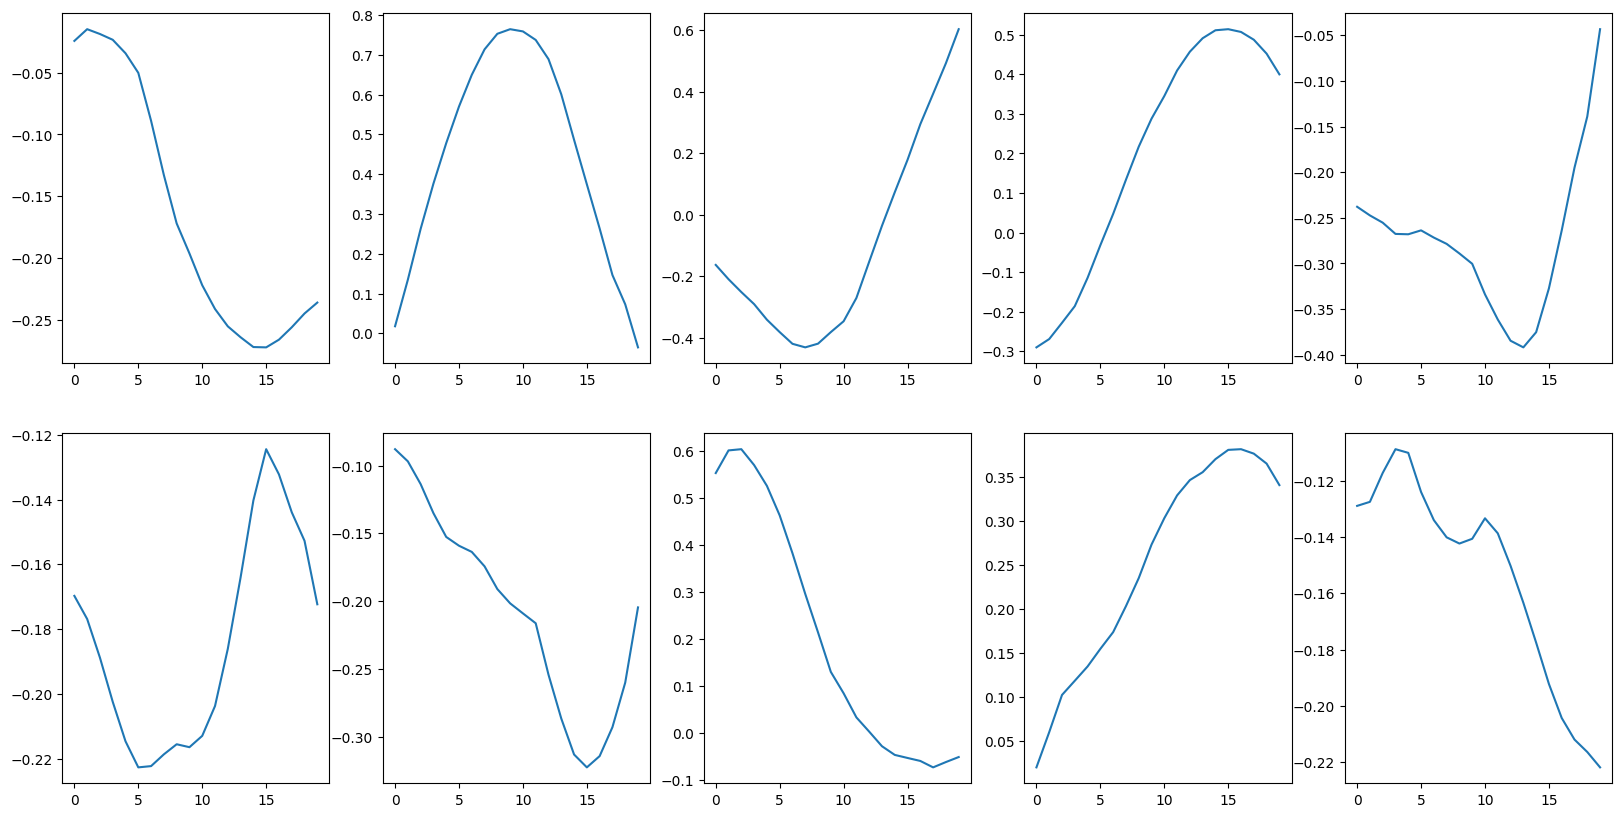

In [45]:
fig, ax = plt.subplots(2, 5, figsize = (20,10))
ax = ax.flatten()
for i, data in enumerate(normal_datset.take(10)): 
    spo2, label_enc = utils._parse_data(data, 'spo2')
    ax[i].plot(spo2)
plt.show()

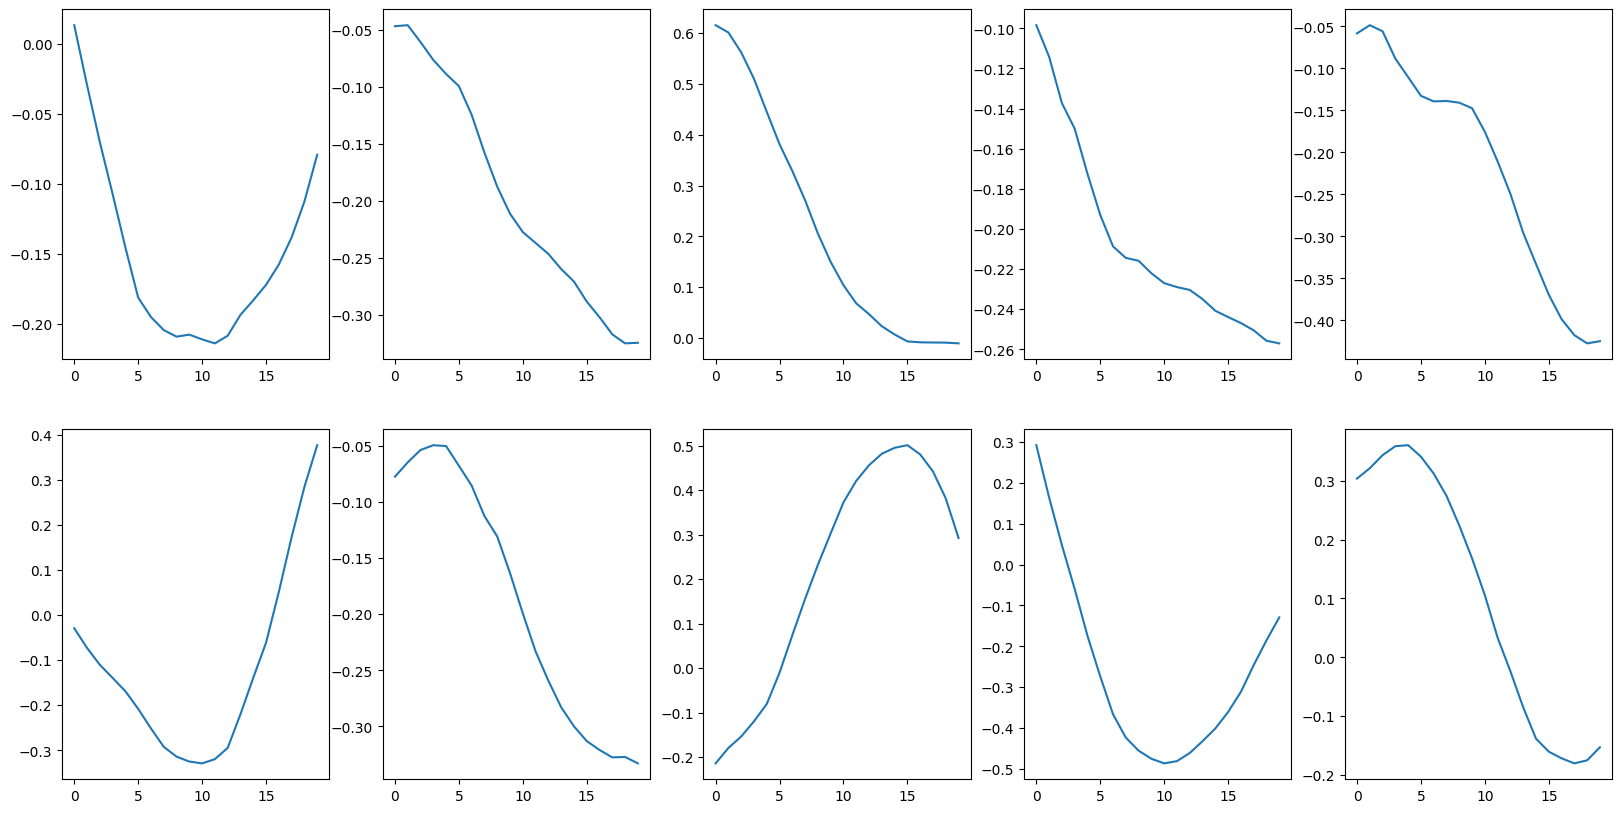

In [47]:
hypopnea_files = data_labels[data_labels['label'] == 2]['file'].values
hypopnea_dataset = tf.data.TFRecordDataset(hypopnea_files)
fig, ax = plt.subplots(2, 5, figsize = (20,10))
ax = ax.flatten()
for i, data in enumerate(hypopnea_dataset.take(10)): 
    spo2, label_enc = utils._parse_data(data, 'spo2')
    ax[i].plot(spo2)
plt.show()

In [ ]:
num_normal = len(data_labels[data_labels['label'] == 0])
num_hypopnea = len(data_labels[data_labels['label'] == 1])
num_apnea = len(data_labels[data_labels['label'] == 2])
num_mixed = len(data_labels[data_labels['label'] == 3])

print(f"Number of non-apneic events: {num_normal}")
print(f"Number of hypopnea events: {num_hypopnea}")
print(f"Number of apneic events: {num_apnea}")
print(f"Number of mixed apnea events: {num_mixed}")
